In [3]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import pearson_correlation as ps
import pre_processing as pre
import graphic as gr
import download_file as dl 
import matplotlib.pyplot as plt  
from statsmodels.graphics.gofplots import qqplot 
from scipy.signal import stft
from scipy import signal
import matplotlib.pyplot as plt
np.random.seed(1234)
from scipy.fftpack import fft, fftfreq
plt.rcParams["figure.figsize"] =(22,15)

In [4]:
#----------------------------------------READ-DATA-----------------------------------------------------
first_column = ['Time','VCPM']
columns = [first_column[x] if x<2 else f'Vi{x}' for x in range(16386)] 
data = dl.read_file('DATASET03.csv',url='http://ltu.diva-portal.org/smash/get/diva2:1244889',separator=',',columns=columns) 
 
#----------------------------------------READ-DATA-----------------------------------------------------
 

In [5]:
data.head(5)

,Time,VCPM,Vi2,Vi3,Vi4,Vi5,Vi6,Vi7,Vi8,Vi9,...,Vi16376,Vi16377,Vi16378,Vi16379,Vi16380,Vi16381,Vi16382,Vi16383,Vi16384,Vi16385
0,0.000000,1100.2980,-1.322455,-1.444341,1.373952,0.257178,0.734968,0.729179,-1.732295,0.448538,...,1.174365,1.410213,1.750882,1.000069,0.110916,-0.950096,-1.225861,-1.697253,-1.214282,-1.212149
1,0.000915,910.2272,-0.937603,-0.350420,0.123714,-1.080818,0.806271,0.311722,-0.350420,0.527459,...,0.914140,0.681643,-0.353772,-0.122190,0.234934,0.866300,0.008227,-0.080444,0.392471,1.193257
2,0.001825,874.5125,0.398565,0.712419,-1.090873,0.011579,1.110984,-0.285516,-0.474134,0.283993,...,0.424161,0.260225,-0.510395,-0.047535,0.750813,-0.699317,-0.441834,0.963808,0.288868,-0.929071
3,0.005484,860.4854,0.990318,-1.895316,0.384853,1.577805,-0.350725,-0.268452,-0.405269,-0.400088,...,0.321168,-0.254436,0.062771,0.111525,-0.445795,-0.155099,0.028034,-0.081054,-0.450671,-0.532639
4,0.005596,1101.7020,-0.184656,0.312636,1.250848,-1.128048,-2.019030,-0.529287,2.424603,0.521060,...,-0.710286,1.241402,0.791340,-3.423758,0.075264,2.087590,-0.337013,-0.570118,2.378287,1.534840


In [6]:
#---------------------------------- SELECT ALL SAMPLE RATE HZ----------------------------------------------
segment_signal = data.iloc[:,2:]
new_signal = segment_signal.iloc[:,:12800]
#Determine variables  
print(new_signal.shape) 
N = len(new_signal.columns)*len(new_signal)#length of the array
Fs = 12800 	#sample rate (Hz)
T = 1/Fs;
print("# Samples:",N)
#---------------------------------- SELECT ALL SAMPLE RATE HZ----------------------------------------------

(3005, 12800)
# Samples: 38464000


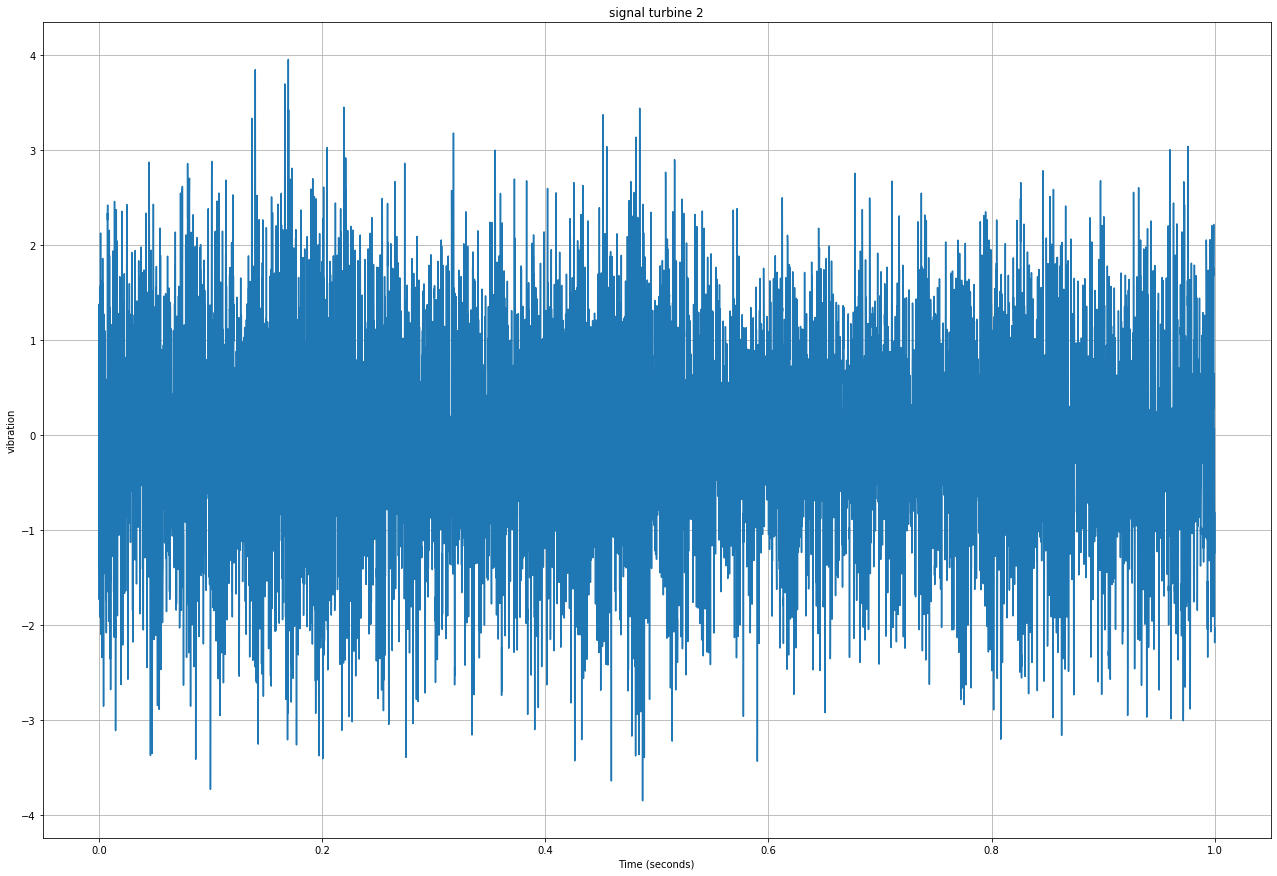

In [8]:
#----------------------------------PLOT HZ FOR 1 SECOND --------------------------------------
#Plot Data
time = [7.8125e-05*x for x in range(len(new_signal.iloc[0,:12800]))] 
plt.figure(1)  
plt.plot(time, new_signal.iloc[0,:12800])
plt.xlabel('Time (seconds)')
plt.ylabel('vibration')
plt.title('signal turbine 2')
plt.grid()  
plt.show()  
time = [7.8125e-05*x*(t+1) for t in range(len(new_signal)) for x in range(len(new_signal.iloc[t,:Fs]))] 
#----------------------------------PLOT HZ FOR 1 SECOND --------------------------------------

In [9]:
1.50238262e+03

1502.38262

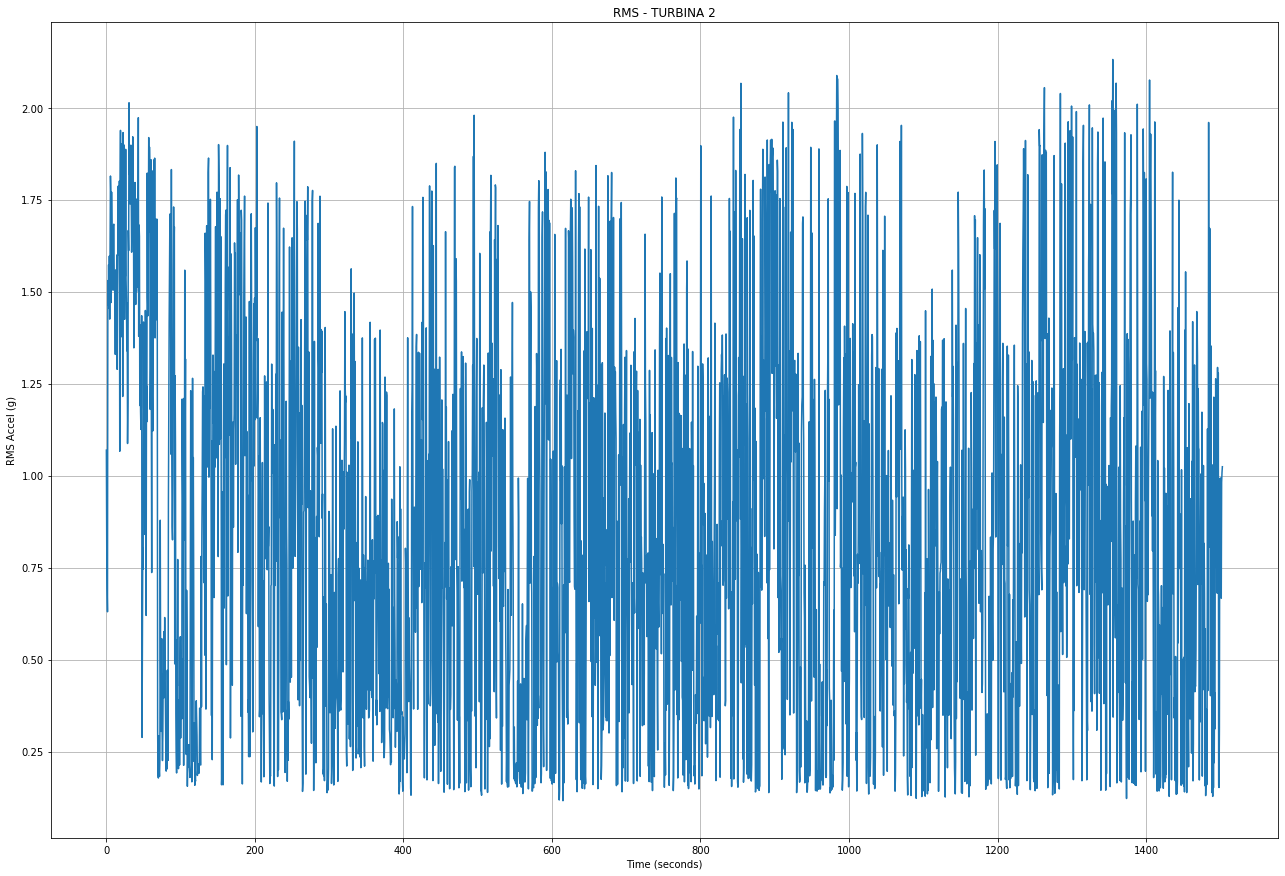

In [10]:
 #--------------------------------VRMS CALCULUS -----------------------------------------
w = np.int(np.floor(Fs)); #width of the window for computing RMS
steps =  np.int_(np.floor(N/w)); #Number of steps for RMS
t_RMS = np.zeros((steps,1)); #Create array for RMS time values
x_RMS = np.zeros((steps,1)); #Create array for RMS values  
for i in range (0, steps):
    t_RMS[i] = np.mean(time[(i*w):((i+1)*w)])
    x_RMS[i] = np.sqrt(np.mean(new_signal.iloc[i,:]**2))   
#--------------------------------VRMS CALCULUS -----------------------------------------

#--------------------------------VRMS LINE PLOT -----------------------------------------
plt.figure(2)  
plt.plot(t_RMS, x_RMS)
plt.xlabel('Time (seconds)')
plt.ylabel('RMS Accel (g)')
plt.title('RMS - TURBINA 2')
plt.grid()  

#--------------------------------VRMS LINE PLOT -----------------------------------------

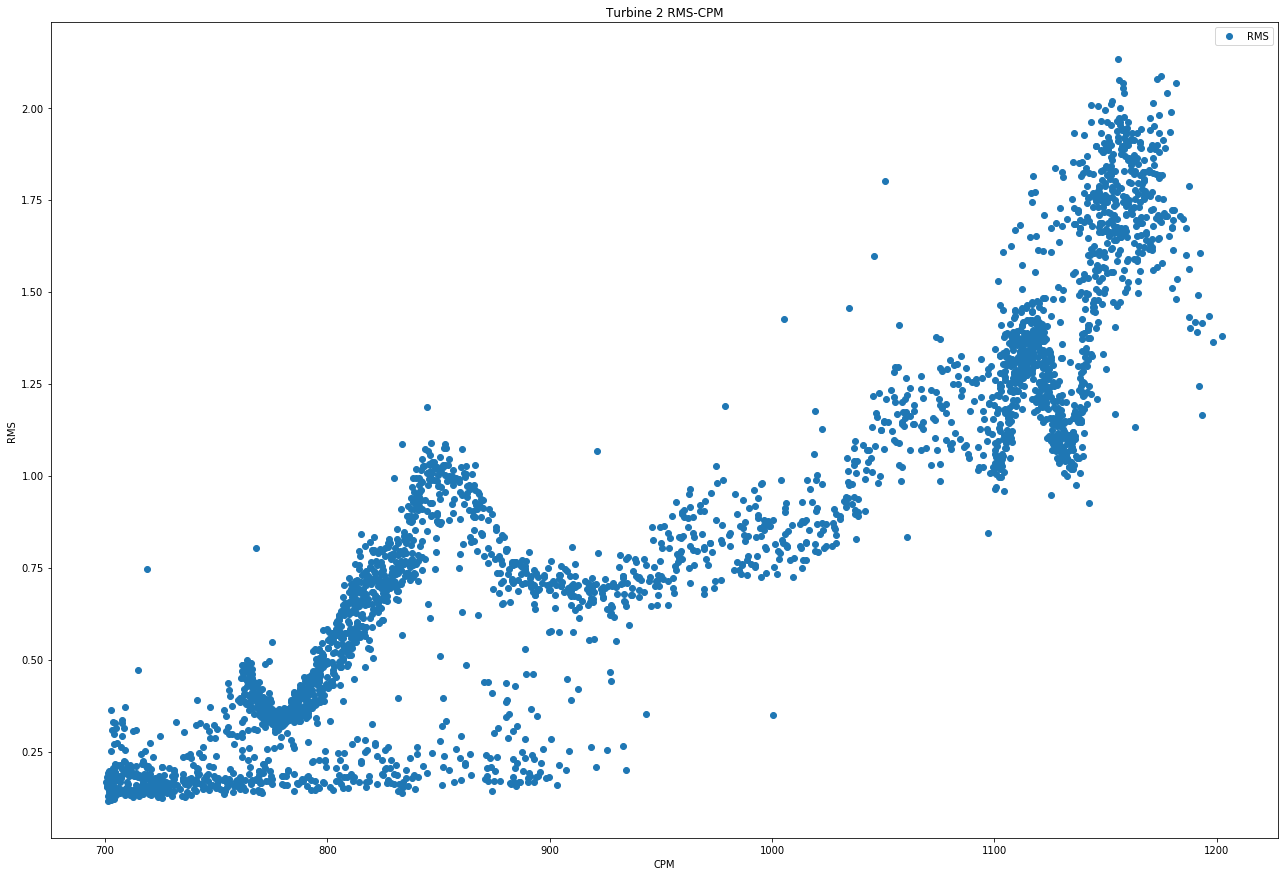

In [11]:
 #--------------------------------VRMS PLOT -----------------------------------------

cpm = data.iloc[:,1:2]
len(cpm)
#scatter plot x - column 0, y - column 1, shown with marker o
plt.plot(cpm,x_RMS, 'o', label = 'RMS')
#create legend in case you have more than one series
plt.legend() 
plt.title('Turbine 2 RMS-CPM')
plt.xlabel('CPM')
plt.ylabel('RMS')
plt.show()
 #--------------------------------VRMS PLOT -----------------------------------------

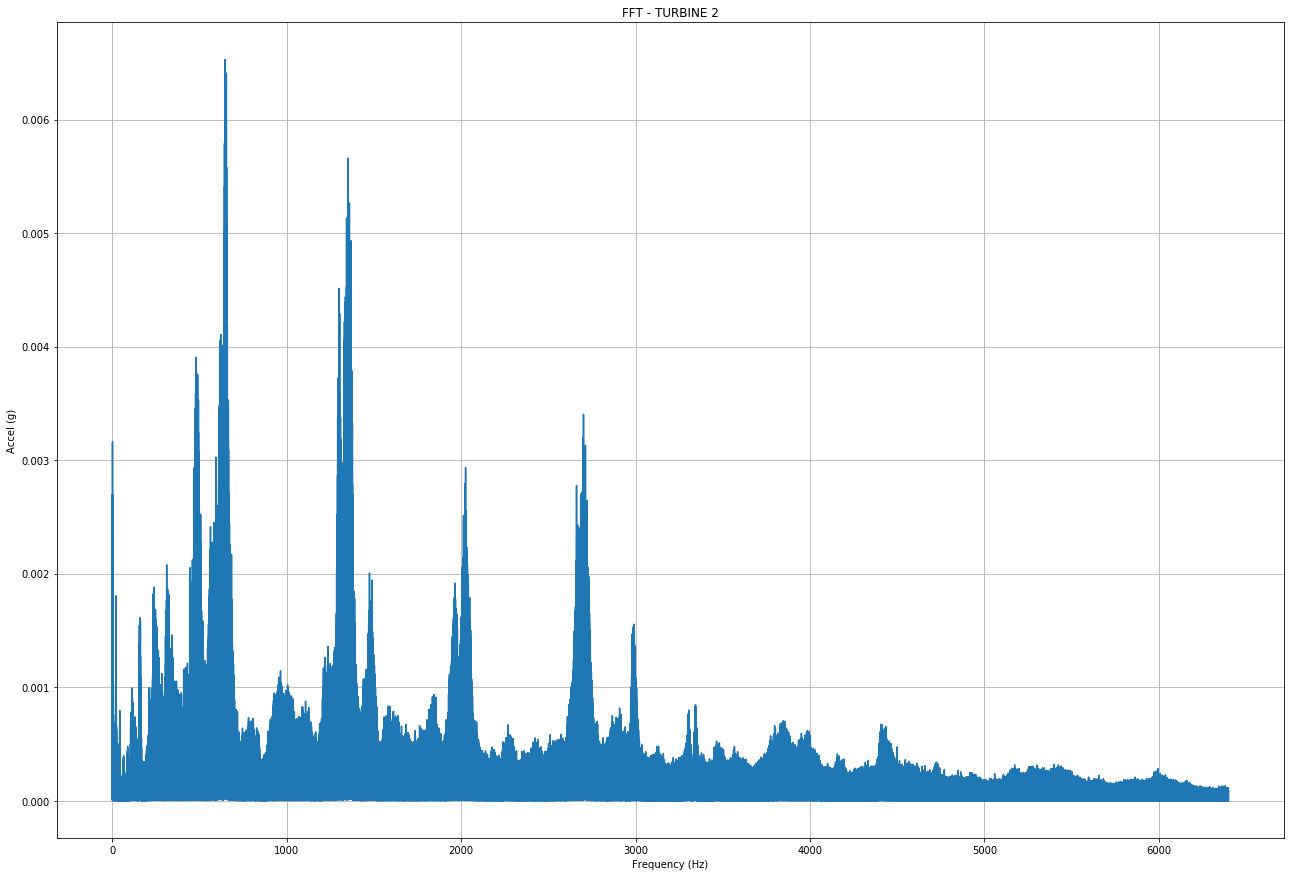

In [12]:
signal_for_day =[]
for i in range (0, 3005):
    signal_for_day.append(new_signal.iloc[i,:])
#------------------------------CALCULUS FAST FOURIER TRANSFORM ---------------------------------
# Number of samples in normalized_tone
N = 12800 * 3005

yf = fft(new_signal.values.flatten())
xf = fftfreq(N, 1 / Fs)
#------------------------------CALCULUS FAST FOURIER TRANSFORM ---------------------------------
#frequenze from 0 to 6000
plt.plot(xf[:(len(xf)//2)], 2.0/N * np.abs(yf[0:np.int(N/2)])) 
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Accel (g)')
plt.title('FFT - TURBINE 2')
plt.show()
 

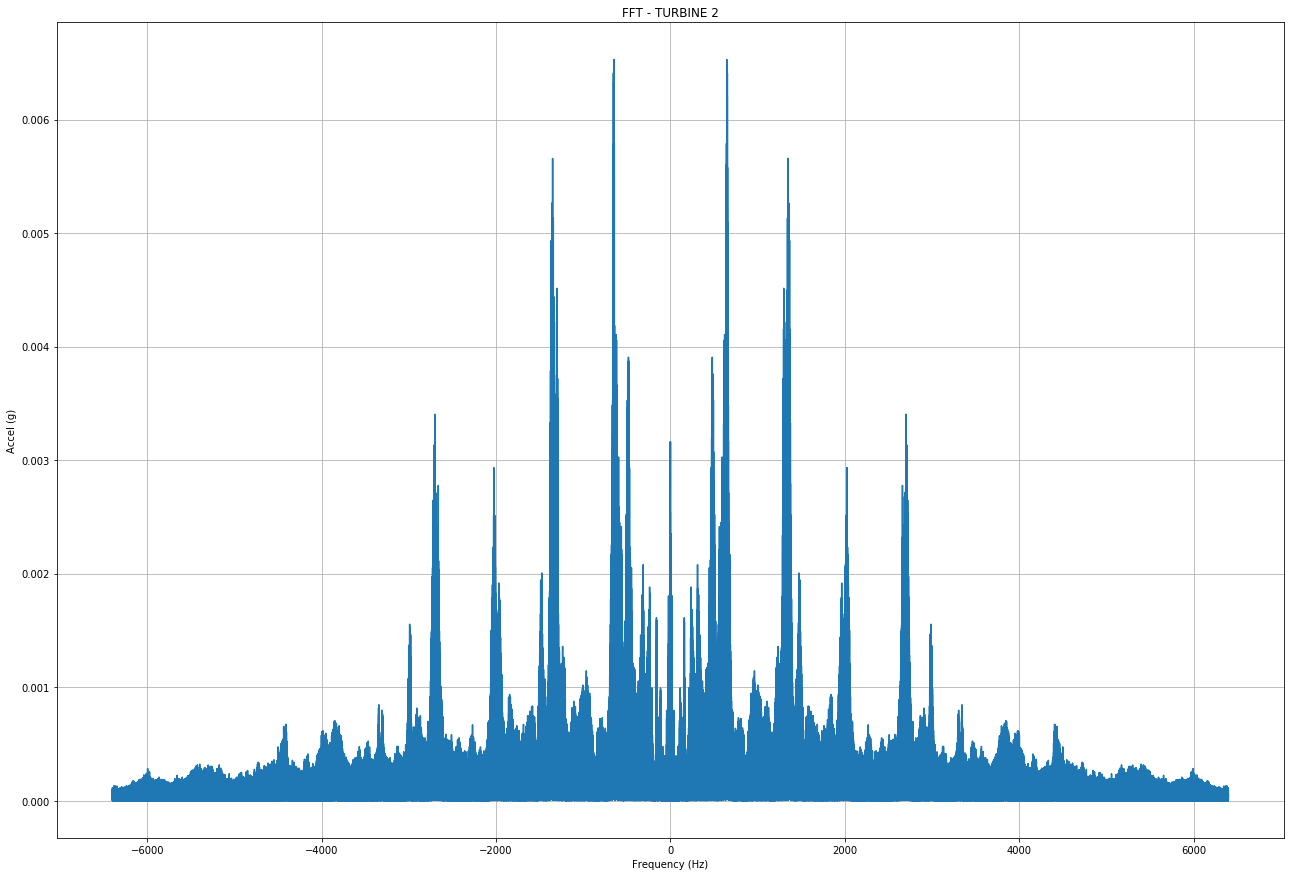

In [13]:
plt.plot(xf, 2.0/N * np.abs(yf)) 
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Accel (g)')
plt.title('FFT - TURBINE 2')
plt.show()

In [14]:
new_signal.head(5)

,Vi2,Vi3,Vi4,Vi5,Vi6,Vi7,Vi8,Vi9,Vi10,Vi11,...,Vi12792,Vi12793,Vi12794,Vi12795,Vi12796,Vi12797,Vi12798,Vi12799,Vi12800,Vi12801
0,-1.322455,-1.444341,1.373952,0.257178,0.734968,0.729179,-1.732295,0.448538,-0.294962,-1.145722,...,0.542999,0.642945,-0.435740,-0.181609,0.067342,-0.713029,-1.246886,-0.814194,-2.185403,-2.032132
1,-0.937603,-0.350420,0.123714,-1.080818,0.806271,0.311722,-0.350420,0.527459,-0.517098,0.720037,...,0.157232,0.440615,0.524107,0.959237,1.468413,2.119585,1.331292,-0.885192,-0.173687,0.342193
2,0.398565,0.712419,-1.090873,0.011579,1.110984,-0.285516,-0.474134,0.283993,0.119448,0.553664,...,0.146567,0.527763,-0.779152,0.255959,1.077161,-0.701145,-0.636546,1.037853,0.233106,-0.581088
3,0.990318,-1.895316,0.384853,1.577805,-0.350725,-0.268452,-0.405269,-0.400088,0.895857,0.001219,...,-0.279117,-0.092328,-0.174905,0.177038,-0.072217,0.020720,0.133769,-0.124018,0.025596,-0.014931
4,-0.184656,0.312636,1.250848,-1.128048,-2.019030,-0.529287,2.424603,0.521060,-1.124392,-1.090873,...,-0.098118,-3.877171,-2.777461,0.435740,0.061552,-1.221900,-2.492249,-0.615216,1.396805,-0.078616


In [15]:
%%latex 
\begin{equation} S(t,f)=\int_{-\infty}^{\infty}x(t)w(t-\tau)e^{-2\pi ft}dt  \end{equation} 
\begin{equation} K(f) =  \frac{\left \langle \left |S(t,f)  \right |^{4} \right \rangle}
{\left \langle \left |S(t,f)  \right |^{2} \right \rangle^{2}}-2, f\neq 0  \end{equation}
Time-Average Operator

<IPython.core.display.Latex object>

In [16]:

#------------------------------CALCULUS SPECTRAL KURTOSIS ---------------------------------
#------------------------------CALCULUS SHORT TIME FOURIER TRANSFORM ---------------------------------
#for signal in new_signal.index:
 #   values = new_signal.iloc[signal,:]
  #  f, t, Zxx = stft(new_signal.values.flatten(), Fs, nperseg=1000)

#------------------------------CALCULUS SHORT TIME FOURIER TRANSFORM ---------------------------------
#------------------------------CALCULUS SPECTRAL KURTOSIS ---------------------------------

In [17]:
values = new_signal.iloc[0,:].values
f, t, _ = stft(values, Fs,nperseg=1000)


NameError: name 'M4' is not defined

In [18]:

from scipy import special
def calculate_kurtosis(Sxx,fs,f,windowSize,confidenceLevel):
    M4=[]
    M2 = []
    for value in Sxx:
        M4.append(np.mean(np.power(value, 2)))   
        M2.append(np.mean(value))   
    
    K = len(Sxx[0])
    SK=[] 
    if K<2:
        for index in range(len(M4)):
            SK.append(M4[index]/np.power(M2[index],2) - 2) 
        
    else:
        for index in range(len(M4)):
            SK.append((K+1)/(K-1)*M4[index]/np.power(M2[index],2) - 2)

    for index in range(len(SK)):
        if f[index]<= (fs/windowSize):
            SK[index]=0
        elif f[index]>= (fs/2-fs/windowSize):
            SK[index]=0
            
    alpha = 1 - confidenceLevel
    threshold = -np.sqrt(2)*special.erfcinv(2*(1-alpha/2))*(2/np.sqrt(K))
    return SK,threshold,M4,M2,K

In [19]:

#probar a cargar todos los archivos matlab para ver resultado 

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
from scipy import signal
plt.rcParams["figure.figsize"] =(22,15)
fig = plt.figure()
ax = fig.gca(projection='3d')
confidenceLevel=0.950 
fs = 97656
window = window = signal.windows.kaiser(300, beta=20)

ax.set_xlim3d(50000,0) 
ax.set_ylim3d(50, 0) 
for i in range(50):  
    
    Sxx ,f, t= mlab.specgram(x=signal_for_day[i].values, Fs=fs ,NFFT=300, window = window, noverlap=150, mode='psd' ,pad_to=1024)   
    SK, threshold,M4,M2,K = calculate_kurtosis(Sxx,fs,f,1024,confidenceLevel)
    day = [i for da in range(513)]
    ax.plot(f, day, SK)
ax.view_init(30, 50)

 


NameError: name 'signal_for_day' is not defined

In [21]:
"""function [SK, threshold] = computeSpectralKurtosis(P, fs, f, window, confidenceLevel)
%COMPUTESPECTRALKURTOSIS compute engine for spectral kurtosis
%
% P - matrix, power spectrogram of x (nonnegative and real)
% fs - sampling frequency
% f - frequency vector
% window - window size for STFT
% confidenceLevel - confidence level for Gaussian white noise

%   Copyright 2017-2020 The MathWorks, Inc.

%#codegen

M4 = mean(P.^2, 2);
M2 = mean(P, 2);
K = size(P, 2);
if K < 2
    SK = M4./M2.^2 - 2;
else
    SK = (K+1)/(K-1)*M4./M2.^2 - 2;  % STFT-based Estimate (with correcting bias)
end
SK(f <= fs/window) = 0;        % SK is set to 0 near f=0
SK(f >= (fs/2 - fs/window)) = 0; % SK is set to 0 near f=fs/2 (Nyquist)
alpha = 1 - confidenceLevel;
threshold = -sqrt(2)*erfcinv(2*(1-alpha/2))*2/sqrt(K);"""

'function [SK, threshold] = computeSpectralKurtosis(P, fs, f, window, confidenceLevel)\n%COMPUTESPECTRALKURTOSIS compute engine for spectral kurtosis\n%\n% P - matrix, power spectrogram of x (nonnegative and real)\n% fs - sampling frequency\n% f - frequency vector\n% window - window size for STFT\n% confidenceLevel - confidence level for Gaussian white noise\n\n%   Copyright 2017-2020 The MathWorks, Inc.\n\n%#codegen\n\nM4 = mean(P.^2, 2);\nM2 = mean(P, 2);\nK = size(P, 2);\nif K < 2\n    SK = M4./M2.^2 - 2;\nelse\n    SK = (K+1)/(K-1)*M4./M2.^2 - 2;  % STFT-based Estimate (with correcting bias)\nend\nSK(f <= fs/window) = 0;        % SK is set to 0 near f=0\nSK(f >= (fs/2 - fs/window)) = 0; % SK is set to 0 near f=fs/2 (Nyquist)\nalpha = 1 - confidenceLevel;\nthreshold = -sqrt(2)*erfcinv(2*(1-alpha/2))*2/sqrt(K);'

In [22]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power),
                         size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise 
f2, t2, Zxx2 = stft(x, fs, nperseg=1000) 

In [23]:
print(len(time))
print(N) 
print(f' len x {len(x)}') 
print(f' value fs x {fs}') 
print(f' len signal {len(new_signal.values.flatten())}')  
print(f' value Fs {Fs}')  

100000
100000.0
 len x 100000
 value fs x 10000.0
 len signal 38464000
 value Fs 12800


In [24]:
(3005/2)

1502.5

In [25]:
1502.5/365

4.116438356164384

In [26]:
5000*16384

81920000

In [27]:
for row in range(len(data)):
   print(f' row {row} {data.iloc[row,2:].mean()}')

 row 0 3.825653458378008e-05
 row 1 0.0002541260518000772
 row 2 0.00025122472978010785
 row 3 0.00018893929744123056
 row 4 0.00022018430381011322
 row 5 3.396034620806438e-05
 row 6 0.00021300539163251236
 row 7 5.6743163352032105e-05
 row 8 9.743606450385471e-05
 row 9 0.0002823209504043768
 row 10 0.00019122687826468238
 row 11 0.00015198463812281986
 row 12 0.0002771506457790574
 row 13 8.525423166360744e-05
 row 14 0.0003032625439587458
 row 15 5.0494162078269095e-05
 row 16 0.00015057117354901447
 row 17 5.4176609257426564e-05
 row 18 0.00011212865678446066
 row 19 3.4555489186517314e-05
 row 20 0.0001961554060549949
 row 21 0.00013799877812915585
 row 22 0.00024651938060670224
 row 23 0.00016050262200193854
 row 24 0.0002681119117937695
 row 25 0.0002626068392430745
 row 26 0.0001432992702810119
 row 27 2.0811406027826278e-05
 row 28 7.318398813182052e-05
 row 29 0.00014727928894941707
 row 30 3.223071192691958e-05
 row 31 3.782877556799892e-05
 row 32 0.0002919734255861752
 ro

In [28]:
data.std()

Time         1.150467
VCPM       158.985649
Vi2          0.960748
Vi3          0.987841
Vi4          1.004685
              ...    
Vi16381      1.000574
Vi16382      1.017269
Vi16383      0.995093
Vi16384      0.992769
Vi16385      0.994033
Length: 16386, dtype: float64

In [60]:

#----------------------------------------PEARSON-----------------------------------------------------
pearson_matrix = ps.pearson_correlation(new_signal)  
result = ps.transform_value(pearson_matrix)
result=result.astype(float)
display(pearson_matrix)
#gr.seaborn_pearson_plot(result)  
#----------------------------------------PEARSON-----------------------------------------------------

In [ ]:

#-----------------------------------FILLNaNVALUES AND SELECT TARGET----------------------------------
wind_turbine = pre.fill_NaN_values(wind_turbine.copy())
y_train_old =pre.select_y(wind_turbine)
wind_turbine = wind_turbine.drop('Rbt_avg',axis=1)   

#-----------------------------------FILLNaNVALUES AND SELECT TARGET----------------------------------
